In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # 使用cpu训练

### 参考torch.optim.SGD

In [14]:
mnist = np.load("../../../../../Other/datasets/NumPy/mnist.npz")
X_train, y_train, X_test, y_test = tf.cast(tf.expand_dims(mnist['x_train'], -1), tf.float32), mnist['y_train'], tf.cast(
    tf.expand_dims(
        mnist['x_test'], -1), tf.float32), mnist['y_test']

# 归一化
X_train, X_test = X_train / 255.0, X_test / 255.0

In [15]:
model = Sequential([
    layers.Conv2D(6, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='relu'),
])

In [7]:
'''
SGD默认参数:
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
)
'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,  # 对应torch.nn.optim.SGD lr参数
                                                momentum=0.95,  # 对应torch.nn.optim.SGD momentum参数
                                                nesterov=True),  # 对应torch.nn.optim.SGD nesterov参数
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3724 - accuracy: 0.8687 - val_loss: 0.0706 - val_accuracy: 0.9780

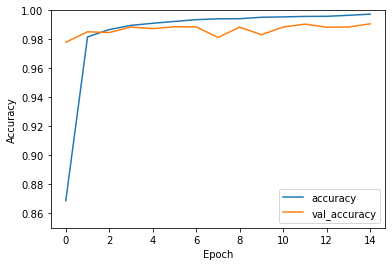

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.85, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1